# Лабораторная работа №2

 ***Выполнили: Созинов Кирилл и Хорев Егор, 19ПМИ-2.***

# Задание I 


Подключаем основные библиотеки:

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загружаем исходный датасет:

In [109]:
df = pd.read_csv('C:/Users/ciril/Datasets/winequality-red.csv')

In [110]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [111]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Взгляд на результат функции $describe()$ дает понять, что таргет *quality* имеет значения от 3 до 8 со средним 5.636

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [113]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

Разделяем датасет на данные и таргет:

In [379]:
X = df.loc[:, "fixed acidity":"alcohol"]
y = df["quality"]

Разделяем выборку на обучающую и тестовую:

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## KNN

Для начала попробуем построить модель KNN используя обучающую/тестовую выборки:

In [381]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([5, 6, 6, 5, 7, 6, 6, 6, 6, 5, 5, 6, 5, 6, 7, 6, 4, 5, 6, 5, 5, 5,
       5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 7, 6, 5, 6, 5, 6, 5,
       6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 7, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5,
       6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5,
       6, 5, 6, 6, 6, 5, 7, 5, 6, 6, 6, 7, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5,
       6, 5, 6, 7, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 7,
       6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 4, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6,
       5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 7,
       5, 7, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5,

In [117]:
def print_metrics(y_test, y_pred, y_prob):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division = True))
    print("F1:", f1_score(y_test, y_pred, average='weighted'))
    print("ROC AUC:", roc_auc_score(y_test, y_prob, average='weighted', multi_class = 'ovr'))

Получаем следующие значения метрик:

In [382]:
print_metrics(y_test, y_pred, y_pred_proba)

Accuracy: 0.48125
Recall: 0.48125
Precision: 0.4892201665352779
F1: 0.46094792789040184
ROC AUC: 0.48053500679161615


Результаты печальны. Попробуем использовать кросс-валидацию:

In [209]:
param_grid = {
    'n_neighbors' : list(range(2, 10)),
    'weights' : ['uniform', 'distance']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, 
                    scoring='f1_weighted', cv=5, verbose=1)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)

print_metrics(y_test, y_pred, y_pred_proba)

'''
---------macro---------
Accuracy: 0.54375 
Recall: 0.30915955091714103
Precision: 0.29844316740717086
F1: 0.303540437348143
ROC AUC: 0.6128491658760278
---------micro---------
Accuracy: 0.625
Recall: 0.625
Precision: 0.625
F1: 0.625
ROC AUC: 0.6172076612903226
-----------------------
'''

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy: 0.615625
Recall: 0.615625
Precision: 0.6347076575316928
F1: 0.597764327659528
ROC AUC: 0.7721074539653374


'\n---------macro---------\nAccuracy: 0.54375 \nRecall: 0.30915955091714103\nPrecision: 0.29844316740717086\nF1: 0.303540437348143\nROC AUC: 0.6128491658760278\n---------micro---------\nAccuracy: 0.625\nRecall: 0.625\nPrecision: 0.625\nF1: 0.625\nROC AUC: 0.6172076612903226\n-----------------------\n'

Получаем более высокие значения метрик. В конечном итоге значение параметра *scoring* в функции $GridSearchCV()$ было выбрано *f1_weighted*, как и *weighted* в метриках. Результаты при других значениях параметра можно увидеть в аннотации.

Лучшее значение гиперпараметра и функция взвешивания получились такие:

In [87]:
grid.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

## Decision tree

Теперь же построим модель *Дерева Решений*:

In [120]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [392]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

print_metrics(y_test, y_pred, y_prob)

Accuracy: 0.625
Recall: 0.625
Precision: 0.6404294757791328
F1: 0.6324811191909235
ROC AUC: 0.7066372056082919


Получаем значения метрик чуть выше чем у KNN модели

Можем взглянуть на важность признаков:

In [122]:
dt.feature_importances_

array([0.05991849, 0.10324775, 0.07453292, 0.08017932, 0.06721782,
       0.06576035, 0.077798  , 0.06270111, 0.0723928 , 0.13876513,
       0.19748631])

Построим наше дерево решений:

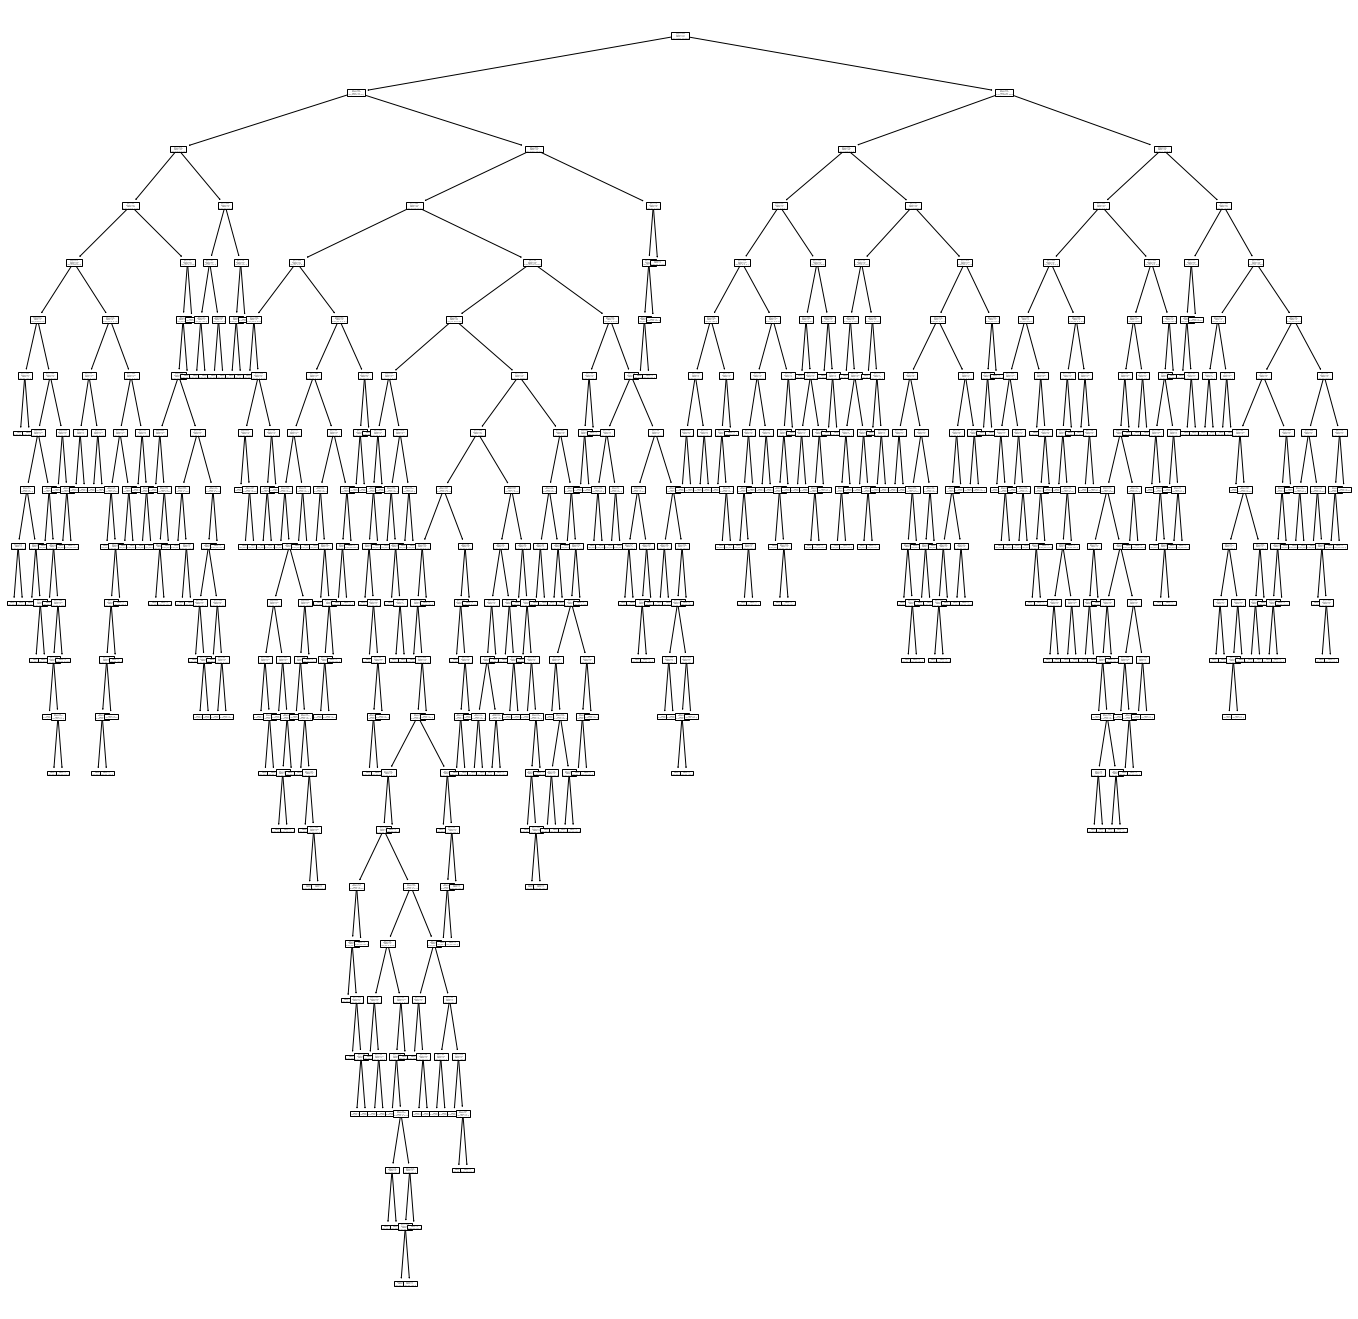

In [123]:
plt.figure(figsize=(24, 24))
plot_tree(dt)
plt.show()

В результате получили модель с неоправданно высокой сложностью. Попробуем воспользоваться *прунингом*:

In [237]:
dt_prun = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=21)
dt_prun.fit(X_train, y_train)
y_pred = dt_prun.predict(X_test)
y_prob = dt_prun.predict_proba(X_test)

print_metrics(y_test, y_pred, y_prob)

dt_prun.feature_importances_

Accuracy: 0.5625
Recall: 0.5625
Precision: 0.5722201293186113
F1: 0.5276667612090485
ROC AUC: 0.6992330386400695


array([0.        , 0.09720186, 0.        , 0.        , 0.        ,
       0.        , 0.08247268, 0.        , 0.        , 0.22952988,
       0.59079559])

Построим дерево:

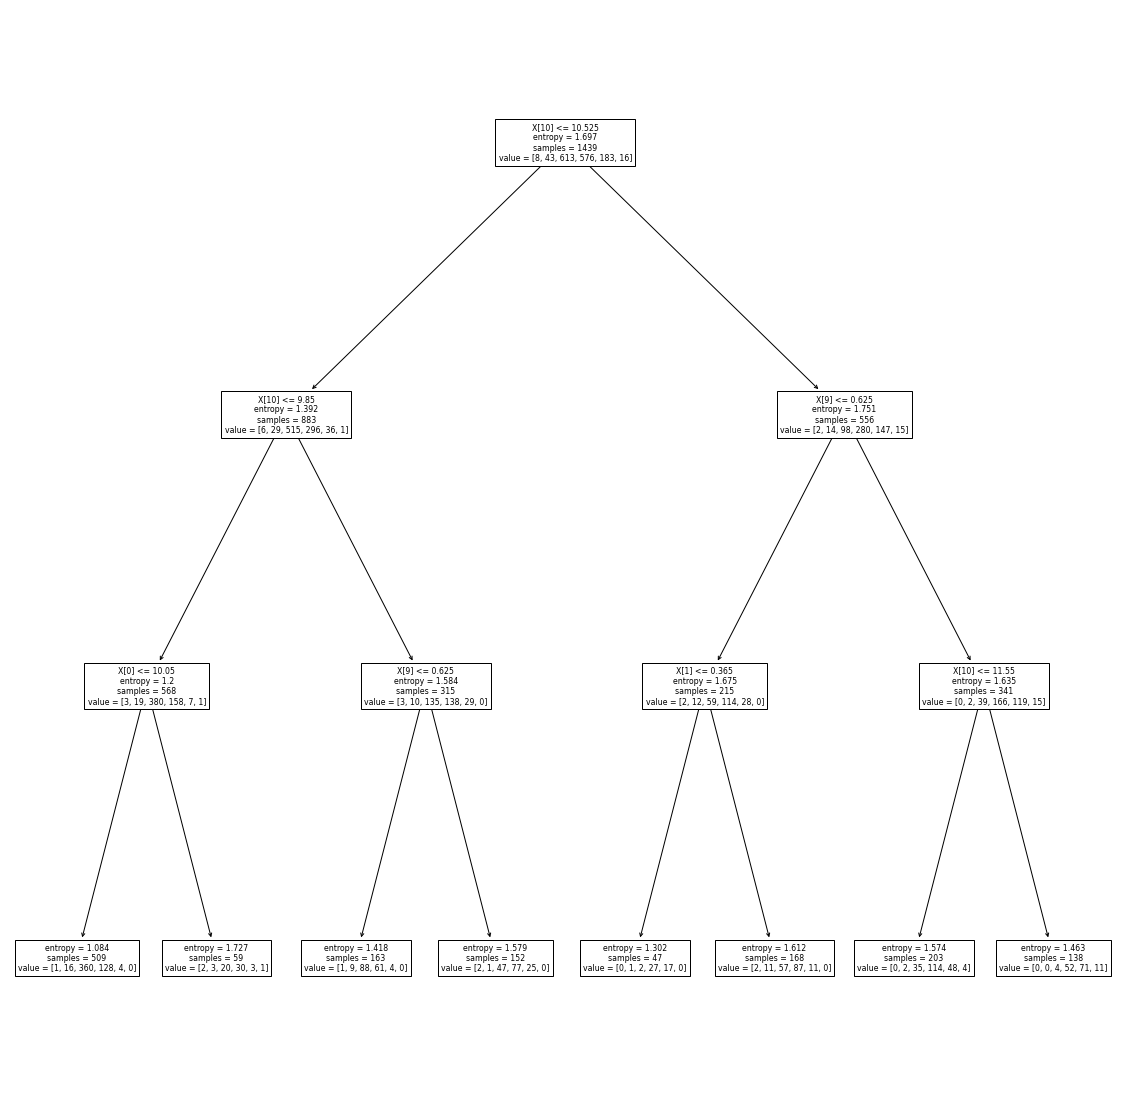

In [91]:
plt.figure(figsize=(20, 20))
plot_tree(dt_prun)
plt.show()

Хоть и значения метрик ухудшились, мы заметно упростили нашу модель.

## SVM

Третьей моделью была выбрана *SVM*:

In [93]:
from sklearn import svm

In [396]:
from sklearn.svm import SVC
svc = SVC(C=10000.0, kernel='rbf', probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_prob = svc.predict_proba(X_test)
print_metrics(y_test, y_pred, y_prob)

Accuracy: 0.584375
Recall: 0.584375
Precision: 0.5787426643192488
F1: 0.5735871478873239
ROC AUC: 0.7344998769109984


Получили следующие значения, не сильно отличающиеся от предыдущих моделей.

Следующий код используется для определения точности по отдельным классам таргета:

In [238]:
k = 0
true_pred = 0
pred_classes = list()
class_ = set(y)
for cl in class_:
    for i, val in y_test.items():
        if val == cl and val == y_pred[k]:
            true_pred += 1
        k += 1
    k = 0
    pred_classes.append(true_pred / len(y_pred[y_pred == 5]))
    true_pred = 0
pred_classes

[0.0, 0.0, 0.5789473684210527, 0.33157894736842103, 0.03684210526315789, 0.0]

Прогнав его через все 3 модели, получились следующие результаты:

In [345]:
results = pd.DataFrame([
[0.0, 0.0, 0.6577181208053692, 0.5503355704697986, 0.11409395973154363, 0.0],
[0.0, 0.006622516556291391, 0.6556291390728477, 0.5231788079470199, 0.11920529801324503, 0.0],
[0.0, 0.0, 0.6094674556213018, 0.44970414201183434, 0.07692307692307693, 0.0]], columns=['3','4','5','6','7','8'])
res = results.transpose()
res

,0,1,2
3,0.000000,0.000000,0.000000
4,0.000000,0.006623,0.000000
5,0.657718,0.655629,0.609467
6,0.550336,0.523179,0.449704
7,0.114094,0.119205,0.076923
8,0.000000,0.000000,0.000000


Нулевой столбец - *KNN*
<br>
Первый столбец - *Дерево решений*
<br>
Второй столбец - *SVM*

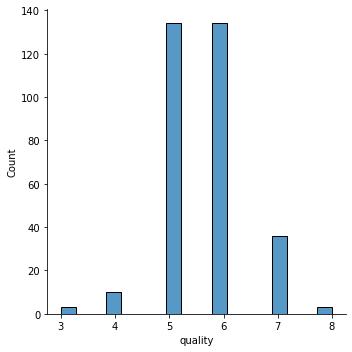

In [327]:
sns.displot(y_test)

Так выглядит гистограмма распределения классов:

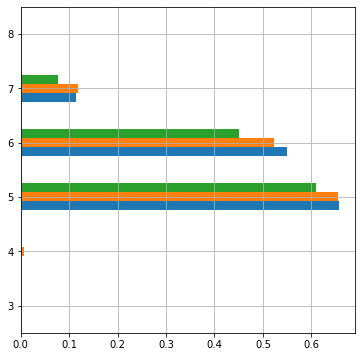

In [365]:
res.plot(kind='barh', grid=True, figsize=(6,6), legend=False);

Так выглядит гистограмма с важностями признаков:

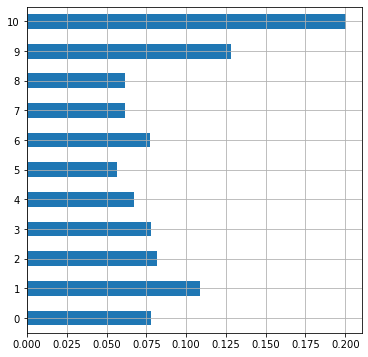

In [366]:
pd.DataFrame(dt.feature_importances_).plot(kind='barh', grid=True, figsize=(6,6), legend=False);

Мы видим, что наиболее выдающийся признак под номером 10(*alcohol*), также выделяются параметры 9(*sulphates*) и 1(*fixed acidity*)

Теперь попробуем улучшить результаты при помощи стандартизации:

In [367]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled.mean(axis=0)

array([ 3.55493551e-16,  1.73303106e-16, -8.88733878e-17, -1.24422743e-16,
        2.13296131e-16, -6.22113715e-17,  4.44366939e-17, -3.47317200e-14,
        2.86172309e-15,  6.75437748e-16,  1.06648065e-16])

In [370]:
X = pd.DataFrame(X_scaled, columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates','alcohol'])
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [375]:
param_grid = {
    'n_neighbors' : list(range(2, 10)),
    'weights' : ['uniform', 'distance']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, 
                    scoring='f1_weighted', cv=5, verbose=1)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)

print_metrics(y_test, y_pred, y_pred_proba)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy: 0.684375
Recall: 0.684375
Precision: 0.7050570768079959
F1: 0.6749061208395392
ROC AUC: 0.8318812019056144


На примере *KNN* модели мы улучшили показатели каждой из метрик примерно на одну десятую, что явно говорит о полезности стандартизации данных.

### Выводы

- Если сравнивать качество моделей по тестовой выборке (без стандартизации), то по *ROC-AUC* и *accuracy* например лучше всего себя показал *KNN* с кросс-валидацией, однако в целом модели выдают приблизительно одинаковые значения критериев, и причем одинаково плохие. Проблема заключается в небольшом размере датасета и при этом очень значительной несбалансированности классов.
- Говоря о сравнении качества моделей по каждым классам отдельно, говорить есть смысл только о классах 5, 6, 7. У класса 5 лучше всего себя показало *дерево решений*, у остальнных двух *KNN*.
- Модели не справились с остальными классами ввиду того же слишком малого количества объектов, принадлежащих этим классам. В тестовой выборке у одного из классов оказалось меньше 10 элементов...
- Из всех выбранных критериев, самым оптимальным является *ROC AUC*, т.к. наши классы очень несбалансированы, а этот критерий наименее чуствителен к этому. При этом он стабильно выдает наибольшие значения относительно других критериев оценки модели, что не может не радовать.
- Модели проявили себя приблизительно одинаково и выделять можно лишь KNN за наибольшее значение критерия *ROC-AUC*.
- Как упоминалось выше в работе, наиболее выдающийся признак под номером 10(*alcohol*), также выделяются параметры 9(*sulphates*) и 1(*fixed acidity*). Остальные же признаки имеют похожие значения, экстремально низких значений важности нет.
- Стандартизация улучшает результаты предсказаний.